In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### BEFORE YOU DO ANYTHING...
In the terminal:
1. Navigate to __inside__ your ILAS_Python repository.
2. __COMMIT__ any un-commited work on your personal computer.
3. __PULL__ any changes *you* have made using another computer.
4. __PULL__ textbook updates (including homework answers).

Then:
1. __Open Jupyter notebook:__   Start >> Programs (すべてのプログラム) >> Programming >> Anaconda3 >> JupyterNotebook
1. __Navigate to the ILAS_Python folder__. 
1. __Open today's seminar__  by clicking on 10_Error_Handling.

A note on coursework assigment:

Please complete your assigment in a __seperate__ folder to your ILAS_python repository.

Start by running the cell below to import some packages that we will use today...

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Error Handling



# Lesson Goal
__Understand the meaning__ of errors generated by your programs and take logical steps to solve them.

Be able to __write exceptions__ to prevent your program from allowing erroneous code to proceed undetected. 

# Objectives
 - Understand the diffrence between *syntax* errors and *exceptions*.
 - Understand how to interpret an error message.
 - Be able to generate exceptions of your own.
 - Be able to write code that *catches* exceptions to prevent your program from quitting if something unexpected happens.
 


# Why we are studying this

When writing code, you occaisionally make mistakes; it happens to everyone.

An important part of learing to program is learning to:
- fix things when they go wrong.
- anticipate things that might go wrong and prepare for them.


# Lesson Structure
- Syntax errors
- Exceptions
 - Raising your own exceptions
 - Catching and handling exceptions
     - Checking user input
     - Checking automatically generated values
 - Real world case study: Integer storage and overflow
- Review Exercises

To identify errors (or bugs), it often helps to:
 - test small parts of the code separately (Jupyter notebook is very useful forn this).
 - write lots of print statements. 

Let's look at an example error message:

In [10]:
for i in range(4):
    print (i)

0
1
2
3


*First*, error messages show you __where__ the error occurred.
<br>Python prints the line(s) in which the error occurred. 

*Second*, error messages print information that is designed to tell you __what__ you are doing wrong. 
<br>The strategy to find out what is going on is to read the last sentence of the error message. 

Sometimes it is easy for Python to determine what is wrong and the error message is very informative. 
<br>Other times you make a more confusing error.
<br>In this case Python often generates an error message gives little explanation of what you did wrong. 

Let's look at some examples of error messages that you are likely to encounter and may have already encountered.

Errors (or *bugs*) can be divided into two types: *syntax errors* and *exceptions*...



## Syntax errors

Syntax errors occur when the code you write does not conform to the rules of the language. 
<br>You will probably have seen many of syntax error messages by now!

### `invalid syntax`
A common error message is `invalid syntax`. 

This means you have coded something that Python doesn't understand. 

For example, this is often:
 - a typo, which you can often spot by looking carefully at the code.
 - a missing symbol (e.g. when expressing a conditional or a loop) 

The code below should:
 - check the value of `a`
 - print the message if the value of `a` is 7. 
 
What's wrong with the code below?

In [2]:
a = 7 

if a == 7:
    print('the value of a equals 7')

the value of a equals 7


Python shows with the `^` symbol to point to which part of your line of code it doesn't understand. 

__Try it yourself__
<br>Write the corrected code in the cell below and run it again:

Use the `^` symbol to work out what is wrong with the code below:

In [4]:
avalue = 7 
if avalue < 10:
    print('the value of avalue is smaller than 10')

the value of avalue is smaller than 10


__Try it yourself__
<br>Fix the code and re-run it in the cell below

Other times, the syntax error message may be less obvious... 

What is wrong with this code?

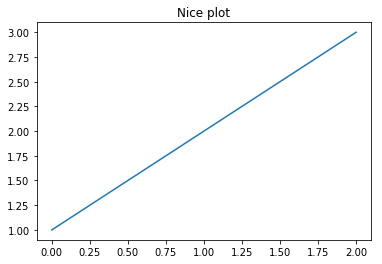

In [11]:
plt.plot([1,2,3]
plt.title('Nice plot')

Python reads `plt.title('Nice plot')` as  part of the `plt.plot` function. In this context, `plt.title('Nice plot')` makes no sense so the position of the error `^` is indicated here.

__Try it yourself__
<br>Fix the code and re-run it in the cell below

## Exceptions

Exceptions are when the *syntax* is correct but something unexpected or anomalous occurs during the execution of a program. 

Python detects some instances of this automatically, e.g.: 
- attempting to divide by zero.
- attempting to compute the dot product between two vectors of different lengths.

Attempting to divide by zero:

In [ ]:
a = 1/0

Attempting to compute the dot product of two vectors of different lengths.

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3, 4]
c = np.dot(a, b)

### Exception types
The error message contains:
 - the __exception type__ designed to tell you the nature of the problem.
 - a message designed to tell you what you are doing wrong.

<br>A full list of Python exception types can be found here: https://docs.python.org/3/library/exceptions.html

Here are a few definitions of exception types:

 - `ValueError` : when a function argument that has the right type but an inappropriate value, and the situation is not described by a more precise exception such as IndexError.
 
 <br>  
 - `TypeError` : when an operation or function is applied to an object of inappropriate type. The associated value is a string giving details about the type mismatch.
 
 <br>
 - `IndexError` : when a sequence subscript is out of range.
 
 <br>
 - `SyntaxError` : when the syntax used is not recognised by Python

Let's look at a few examples of errors generated by Python automatically.

### `IndexError: list index out of range`

In [24]:
x = [1, 2, 3]
for i in range(4):
    print(x[i])

1
2
3


IndexError: list index out of range

Error message:
<br>`IndexError: list index out of range`

The length of the array `x` is 3 (so `x[0]`, `x[1]`, and `x[2]`), while you are trying to print `x[3]`. 

An ----> arrow points to where this problem was encountered.

__Try it yourself__
<br>In the cell below, fix the code and run it again.

### Longer error messages

Remember that error messages *first* show you __where__ the error occurred.

If the code you write contains imported modules, this message appears as a *traceback* from the function that generates the error, all the way down to the code that you wrote. 

Python will show the step that was violated in every file between the original function and your code.

If the code you write contains imported modules that themselves import modules, this message can be very long. 



For each file, it prints a few lines of the code to the screen and points to the line where the error occurred with an ---> arrow. 

In the code below, the error occurs in the line `plt.plot(xdata, ydata)`, which calls a function in the `matplotlib` package.

The matplotlib function generates the error when it tries to plot `y` vs. `x`. 
<br>*Note:* the is a generic error message from `matplotlib`; it doesn't substitute the names of the arrays you have assigned in your code.

In [ ]:
def func(x, a=2, b=3):
    y = b * np.exp(-a * x)

xdata = np.linspace(0, 4, 10)

ydata = func(xdata, b=4, a=1)

plt.plot(xdata, ydata);

The problem is that `x and y must not be None`. 

In this case `x` and `y` refer to `xdata` and `ydata`, because that is what the variables are called in the `matplotlib` function. 

Let's print `xdata` and `ydata` to see what is wrong:

In [ ]:
print(xdata)
print(ydata)

`xdata` is indeed an array with 10 values.

`ydata` is equal to `None` i.e. it exists but has no value assigned to it.

Why is `ydata` equal to `None`?

Look carefully at the function again to find what needs correcting:

```Python
def func(x, a=2, b=3):
    y = b * np.exp(-a * x)

xdata = np.linspace(0, 4, 10)

ydata = func(xdata, b=4, a=1)

plt.plot(xdata, ydata);
```

__Try it yourself__
<br>Re-write the function in the cell below and run the code again: 

When you have resolved all the errors that Python has detected, your code will run.

Unfortunatley, this doesn't necessarily mean that your program will do what you want it to...

## Raising exceptions

Because the intended functionality of the program is only known by the programmer, exceptions can require more effort to detect than syntax errors.

Examples, where the code will run but the output will be *incorrect*: 
- receiving negative data when only positive data is permitted, e.g. a negative integer for the number students in a class.
- unexpected integer overflows




If invalid data is encountered, the program should output an informative message, just like when an error is detected automatically. 

Let's look at an example from __Seminar 5: Functions__ 



### Parameter validity checking


__Hydrostatic Pressure 静水圧__

We defined a function to calculate the hydrostatic pressure.

The hydrostatic pressure (Pa = Nm$^{-2}$ = kg m$^{-1}$s$^{-2}$) is the pressure on a submerged object due to the overlying fluid):

$$
P = \rho g h
$$

$g$ = acceleration due to gravity, m s$^{-2}$
<br> $\rho $ = fluid density, kg m$^{-3}$
<br> $h$ = height of the fluid above the object, m. 

<img src="img/HydrostaticPressure.png" alt="Drawing" style="width: 350px;"/>

In [ ]:
def hp(h, rho = 1000, g = 9.81):
    """
    Computes the hydrostatic pressure acting on a submerged object given:
    - the density of the fluid in which is it submerged, rho
    - the acceleration due to garvity, g
    - the height of fluid above the object, h
    """
    return rho * g * h

This expression makes sense only for $\rho g$ and $h > 0$.

However, we can input negative values for h of these parameters without raising an error.

In [ ]:
hp(-300, -20)

It is easy to input negative values by mistake, for example :
 - *the user makes a mistake*
 
 <br>
 - *another function takes the same quantity expressed using the opposite sign.* <br>Example: in Seminar 5: Functions we also consider a function to the height of a particle at time t, when falling from rest at height $r(0)$ with constant acceleration in which acceleration due to gravity is a negative value. 
 
```Python 
 def position(t, r0, v0=0.0, a=-9.81):
        return r0 + (v0 * t) + (0.5 * a * t**2)
    ```

Rather than return an incorrect result, which could easily be overlooked, we can raise an exception in the case of invalid data.

### How to raise an exception
 - The keyword `raise` 
 - The type of the exception
 - A string saying what caused it in () parentheses.


In [25]:
def hp(h, rho = 1000, g = 9.81):
    """
    Computes the hydrostatic pressure acting on a submerged object.
    h = height of fluid above object, rho = fluid density, g = gravity 
    """
    if h < 0:
        raise ValueError("Height of fluid, h, must be greater than or equal to zero")
    if rho < 0:
        raise ValueError("Density of fluid, rho, must be greater than or equal to zero")
    if g < 0:
        raise ValueError("Acceleeration due to gravity, g, must be greater than or equal to zero")

    return rho * g * h


The type of exception must be one that Python recognises.
<br>i.e. it must appear of the list of built-in Python exceptions: https://docs.python.org/3/library/exceptions.html
<br>(You can even write your own exception types but that is outside the scope of this course.)

There are no fixed rules about which error type to use. Choose the one that is most appropriate. Above, we have used the exception type `ValueError`.   

 - `ValueError` : when a function argument that has the right type but an inappropriate value, and the situation is not described by a more precise exception such as IndexError.


Note: These are the same types that are generated when Python automatically raises an error.

Now if we run the same function again...

In [ ]:
hp(-300, -20)

Note that only the *first* exception that Python encounters gets raised. 

The program exits at the first error, just like automaticaly generated errors.

### Catching and handling exceptions
We don't always want the programs we write to exit when an error is encountered.
<br>Sometimes we want the program to 'catch' the exception and then continue to do something else.

Let's use a real-world example to illustrate this:

USS Yorktown was a US Navy "Smart Ship" with a computer system fitted to operate a control centre from the ship's bridge. 
<br>In 1997, a crew member entered data into the system that led to an attempted division by zero. <br>The program exited, causing the ship's computer systems and the ship's propulsion systems to shut down. 


<img src="img/USS_Yorktown.jpg" alt="Drawing" style="width: 30%;"/>

Code similar to that shown in the following cell would have been used to accept a user input and divide a number by that input. 

If we input a non-zero numerical value, the, code works.

If we enter zero, it generates an error.

In [ ]:
# Input a value and convert it from a string to a numerical type
val = int(input("input a number"))

new_val = 1 / val

It is undesirable for the ships software to:
 - __stop__ if input data leads to a divide-by-zero.
 - __proceed erroneously__ and without warning.
 
The software needs to 'catch' the divide-by-zero exception, and do something else.


What could we make the to program do instead of exiting?

One solution might be to:
 - reduce the propulsion force.
 - ask for revised input.

### `try` and `except`
In Python, the key words `try` and `except` are used to catch errors:
```python
try:
    # Attempt to do something here that might raise an exception
    # If no 'FooError' exception is raised:
        # - Run this indented code.
        # - Skip the indented code after except 
except FooError:
    # If a 'FooError' exception is raised above:
        # - Skip the indented code after try.
        # - Run this indented code.
    
    # For exception types other than FooError:
        # - the exception will not be caught.
        # - the program will stop.
        # - the error message will be printed.
    # If FooError is omitted, ANY exception type will be caught
```

So for the Smart Ship, try and accept could have been used to prevent the program exiting if a `ZeroDivisionError` was generated:

In [1]:
val = 0

try:
    new_val = 1 / val
    
    print(f"new number = {new_val}")


except ZeroDivisionError:    
    print("Zero is not a valid input. Reducing propulsion force...")

Zero is not a valid input. Reducing propulsion force...


Several `except` statements can be used to take care of different errors.

This can include assigning several exception types to a single `assert` statement by placing them inside of a tuple.

The following sudo-code shows example with a series of `except` statements.

In [ ]:
try:
   # do something
   pass

except ValueError:
   # handle ValueError exception
   pass

except (TypeError, ZeroDivisionError):
   # handle multiple exceptions
   # TypeError and ZeroDivisionError
    pass

except:
   # handle all other exceptions
   pass

### Checking interactive user input
In the case of the smart ship, the input value is given by the user:

In [3]:
try:
    # Ships computer system requests number from user
    val = int(input("input a number "))
    
    new_val = 1 / val
    
    print(f"new number = {new_val}")


except ZeroDivisionError:
    
    print("Zero is not a valid input. Reducing propulsion force...")


input a number 0
Zero is not a valid input. Reducing propulsion force...


By catching the exception, we avoid running the part of the code that will generate the error and stop the prgram.

However, that means we have not created a variable called new_val, which the problem code section was intended to do.

This can cause problems later in the program.

### Re-requesting user input

Recall our example error-catching solution for the smart ship - if an error is generated:
 - reduce the propulsion force.
 - __ask for revised input.__
 

One way to do this is to use a `while` loop with a `break` statement.

We keep requesting user input until valid input is given.

At that point, the `break` statement exits the loop.

In [2]:
while True:
    try:
        x = int(input("Please enter an even number: "))
        
        if (x % 2 != 0):
            raise ValueError("Odd number entered")
        
        break
            
    except ValueError:
        print("Not a valid number. Try again...")

Please enter an even number: 3
Not a valid number. Try again...
Please enter an even number: 3
Not a valid number. Try again...
Please enter an even number: four
Not a valid number. Try again...
Please enter an even number: 2


To make our program more readable we can also encapsulate the code in a __recursive__ function.

For example, for the smart ship:

In [ ]:
def SmartShip():
    try:
        # Ships computer system requests number from user
        val = int(input("input a number "))
        new_val = 1 / val
        print(f"new number = {new_val}")


    except ZeroDivisionError:
        print("Zero is not a valid input. Reducing propulsion force...")
        # Request new input by re-running the function.
        return SmartShip()

    
new_val = SmartShip()
print(f"new_val = {new_val}")

This first example features an exception that *prevents* Python's default response to the error (i.e. exiting the code).

__Try it yourself__
<br>Using the same format as the `SmartShip` example:
```python
try:
    # Attempt to do something here that might raise an exception
    # If no 'FooError' exception is raised:
        # - Run this indented code.
        # - Skip the indented code after except 
except FooError:
    # If a 'FooError' exception is raised above:
        # - Skip the indented code after try.
        # - Run this indented code.
    
    # For exception types other than FooError:
        # - the exception will not be caught.
        # - the program will stop.
        # - the error message will be printed.
    # If FooError is omitted, ANY exception type will be caught
```
write a function that:
- asks the user to input their age.
- returns the users age.
- raises an exception if the user's age is >0 and asks the user to try again.

### Automatically checking parameters within code

It can also be useful to check values that are generated automatically (e.g. due to imported data such as files or sensor readings).


#### Background: bits and bytes

The smallest unit of computer memory is the *bit*; and each bit can take on one of two values; 0 or 1. 

For many computer architectures the smallest usable 'block' is a *byte*.

One byte is made up of 8 bits. 

(e.g. a 64-bit operating system, a 32-bit operating system ... the number of bits will almost always be a multiple of 8 (one byte).)




The 'bigger' a thing we want to store, the more bytes we need. 

In calculations, 'bigger' can mean:
- how large or small the number can be.
- the accuracy with which we want to store a number. 


### Binary Numbers

When using the binary system each number is reresented by summing a combination of base 2 numbers ($2^0, 2^1, 2^2....$).


For example, the table show the binary representation of number 0 to 15 (the maximum number that can be represeted by 4 bits.

The sum of the base 2 columns marked with a 1 is found as the decimal number in the left hand column.

The combination of 1s and 0a used to generate this decimal number, is its binary representation.

|Decimal|                     Binary                              ||||
|:------------:|:-----------:|:-----------:|:-----------:|:---------:|
|              |$2^3=8$      |$2^2=4$      |$2^1=2$      |$2^0=1$    | 
|0             |0            |0            |0            |0          | 
|1             |0            |0            |0            |1          | 
|2             |0            |0            |1            |0          | 
|3             |0            |0            |1            |1          | 
|4             |0            |1            |0            |0          | 
|5             |0            |1            |0            |1          | 
|6             |0            |1            |1            |0          | 
|7             |0            |1            |1            |1          | 
|8             |1            |0            |0            |0          | 
|9             |1            |0            |0            |1          | 
|10            |1            |0            |1            |0          | 
|11            |1            |0            |1            |1          | 
|12            |1            |1            |0            |0          | 
|13            |1            |1            |0            |1          | 
|14            |1            |1            |1            |0          | 
|15            |1            |1            |1            |1          | 



  



The __largest number__ that can be represented by $n$ bits is:

$2^{n} - 1$

The -1 comes from the fact that we start counting at 0 (i.e. $2^0$), rather than at 1 (i.e. $2^{1}$).

If, for example we had 5 bits, 10000 would equal $2^4$.

From the pattern of 1s and 0s in the table, we can see that by subtracting 1:

$2^4-1$ 

we should get the 4 bit number 1111.


The __largest postitive integer__ that can be represented by $n$ bits is:

$2^{n-1} - 1$

The power $n-1$ is becuase there is one less bit available when storing a *signed* integer.

One bit is used to store the sign; + positive or - negative (represented as a 0 or a 1)

The __largest negative integer__ that can be represented by $n$ bits is:

$2^{n-1}$ 

The first number when counting in the positive direction (0000 in the 4 bit example above) is zero.
<br>Zero does not need a second representation in the negative scale.
<br>Therefore, when counting in the negative direction:
 - 0000 = -1 (not 0)
 - 0001 = -2 
 - ....

The __largest unsigned integer__ that can be represented by 4 bits is:

$2^{4} - 1 = 15$

The __largest positive signed integer__ that can be represented by 4 bits is:

$2^{4-1} - 1 = 7$

The __largest negative signed integer__ that can be represented by 4 bits is:

$2^{4-1} = 8$

### Integer storage and overflow

In most languages (C, C++ etc), a default number of bits are used to store a given type of number.

Python is different in that it *automatically* assigns a variable type to a variable. 

Therefore it also automatically assigns the number of bits used to store the variable.





This means it will assign as many bytes as needed to represent the number entered by the user. 

It starts with a 32 bit number and assigns more bytes as needed. 

The largest (and smallest! - we will see how decimals are stored in next weeks seminar) number that Python can store is theoreticaly infinite. 

The number size is, however, limited by the computer's memory.

However, when using Numpy, it is possible for an integer to *overflow* as C-style fixed precision integers.

In this case, a maximum size of 64 bits are used.

$2^{64-1} - 1 = 9.223372037 \times 10^{18}$

So if we use a number greater than $2^{64-1} - 1$ the integer will *overflow*.

### Example: Numpy integer overflow 
In the array below:
- The value with index `a[0]` is $2^{63} - 1$, the maximum storable value.
- the data type is specified to make sure is an int.

In [3]:
a = np.array([2**63 - 1], dtype=int)

print(a, a.dtype)


[9223372036854775807] int64


The `bin` function prints the number in binary form, as a string.
<br>(prefix `0b` for positive numbers, prefix `-0b` for positive numbers)
<br>It is important to note that values are represented as regular binary number, NOT using their signed storage representation.

e.g. 
    
    0b101 = 5, -0b101 = -5

In [4]:
print(bin(5), bin(-5))

0b101 -0b101


In [5]:
print(a, a.dtype)

print(bin(a[0]))

print(type(a[0]))

print(len(bin(a[0]))) # Number of characters in binary string representation

[9223372036854775807] int64
0b111111111111111111111111111111111111111111111111111111111111111
<class 'numpy.int64'>
65


    [9223372036854775807] int64
    0b111111111111111111111111111111111111111111111111111111111111111
    <class 'numpy.int64'>
    65


There are 65 characters in the string.
<br>The first two `0b` tell us it is a positive binary number.

The 63 characters that follow tell us that the number is  $2^{63}-1$.

$-2^{63}-1$ is the largest value that can be stored by a 64 bit signed integer.

Adding 1 to the array will cause it to overflow.

Overflow means that the number's value loops round to start again from it's smallest possible value.

In [6]:
a += 1

print(bin(a[0]))

print(type(a[0]))

print(len(bin(a[0]))) # Number of characters in binary string representation

-0b1000000000000000000000000000000000000000000000000000000000000000
<class 'numpy.int64'>
67


    -0b1000000000000000000000000000000000000000000000000000000000000000
    <class 'numpy.int64'>
    67


There are 67 characters in the string.
<br>The first three `-0b` tell us it is a negative binary number.

The 64 characters that follow tell us that the number is  $2^{63}$.

$-2^{63}$ is the lowest value that can be stored by a 64 bit signed integer.

To see the number of bits required to store a number, use the bit_length method.

In [20]:
b = 8**12
print(b, type(b))
print(b.bit_length(), end="\n\n")


b = 8**24
print(b, type(b))
print(b.bit_length())

68719476736 <class 'int'>
37

4722366482869645213696 <class 'int'>
73


## Example: Error handling with integer type conversion

An un-caught error due to storage limits led to the explosion of an un-manned rocket, *Ariane 5* (European Space Agency), shortly after lift-off (1996).

We will reproduce the precise mistake the developers of the Ariane 5 software made.

<img src="img/ariane5.jpg" alt="Drawing" style="width: 300px;"/>



The Ariane 5 rocket explosion was caused by an integer overflow. 

The speed of the rocket was stored as a 64-bit float.

This was converted in the navigation software to a 16-bit integer. 



However, the value of the float was greater than 32767, the largest number a 16-bit integer can represent.

This led to an overflow that in turn caused the navigation system to fail and the rocket to explode.



We can demonstrate what happened in the rocket program. 

Consider a speed of 40000.54 stored as a `float` (64 bits)(units are not relevant to what is being demonstrated):

In [ ]:
speed_float = 40000.54

Let's first convert the float to a 32-bit `int`.

We can use NumPy to cast the variable as an integer with a fixed number of bits.

In [ ]:
speed_int = np.int32(speed_float)  
print(speed_int)
print(bin(speed_int))

The conversion behaves as we would expect. 



Now, if we convert the speed from the `float` to a 16-bit integer...

In [ ]:
speed_int = np.int16(speed_float)
print(speed_int)
print(bin(speed_int))

We see clearly the result of an integer overflow since the 16-bit integer has too few bits to represent the number 
40000.

What might we want to program to do to avoid the integer overflow?

As a 16 bit integer was chosen, small memory usage was clearly an objective when writing the program.

One solution is to incrementally step through increasing integer sizes (16 bit, 32 bit, 64 bit ... ).
<br>When we find an integer size that is large enough to hold the variable, we  store the variable. 

This means we:
- always select the minimimum possible variable size.
- avoid overflow errors.

One way to do this is using `if` and `else`.
<br>This is known as LBYL (look before you leap) programming. 

In [ ]:
speed_float = 32_10.0         # (small enough for a 16-bit int)
speed_float = 42_767.0        # (too large for a 16-bit int)
speed_float = 2_147_500_00.0  # (too large for a 32-bit int)

# Check if the number to store will fit in a 16 bit integer.
if abs(speed_float) <= (2**(16-1) - 1):
    vel = np.int16(abs(speed_float))
        
# Check if the number to store will fit in a 32 bit integer.
elif abs(speed_float) <= (2**(32-1) - 1):
    vel = np.int32(abs(speed_float))
    
else:
    raise OverflowError("Value too large for 32-bit int.")

We can use `try` and `except` to do the same thing. 

In general, the main advantages of using `try` and `except`:
- speed-ups (e.g. preventing extra lookups: `if...and...and...and...`)
- cleaner code (less lines/easier to read)
- jumping more than one level of logic (e.g. where a break doesn't go far enough)
- where the outcome is likely to be unexpected (e.g. it is difficult to define `if` and `elif` conditional statements).
 
This is known as EAFP (easier to ask for forgiveness than permission) programming.


###### Remember the `try` and `except` structure:

```python
try:
    # Attempt to do something here that might raise an exception
    # If no 'FooError' exception is raised:
        # - Run this indented code.
        # - Skip the indented code after except 
except FooError:
    # If a 'FooError' exception is raised above:
        # - Skip the indented code after try.
        # - Run this indented code.
    
    # For exception types other than FooError:
        # - the exception will not be caught.
        # - the program will stop.
        # - the error message will be printed.
    # If FooError is omitted, ANY exception type will be caught
```

Let's write two functions to try:

In [11]:
def cast_v_16(v):
    "Convert to a 16-bit int."
    if abs(v) <= (2**(16-1) - 1):
         return np.int16(v)
        
    else:
        raise OverflowError("Cannot safely cast velocity to 16-bit int.")

        
        
def cast_v_32(v):
    "Convert to a 32-bit int."
    if abs(v) <= (2**(32-1) - 1):
         return np.int32(v)
        
    else:
        raise OverflowError("Value too large for 32-bit int.")

Then use each of the functions in the `try` except structure.

In [12]:
v = 32_10.0         # (small enough for a 16-bit int)
v = 42_767.0        # (too large for a 16-bit int)
v = 2_147_500_000.0  # (too large for a 32-bit int)

try:
    # Try to cast v as 16-bit int.
    vel = cast_v_16(v)
    print(vel)

except OverflowError:
    # If cast as 16-bit int failed, raise exception.
    # Try to cast v as 32-bit int.
    try:
        vel =  cast_v_32(v)
        print(vel)
    
    except OverflowError:
        # If cast as 32-bit int failed, raise exception
        raise RuntimeError("Could not cast velocity to an available int type.")


print(type(vel))        

RuntimeError: Could not cast velocity to an available int type.

This block of code can itself be placed inside of a function to make the code more concise.
<br>The only change made is returning the cast variable instead of storing it as the variable `vel`.

In [13]:
def cast_velocity(v):
    try:
        # Try to cast v to a 16-bit int
        return cast_v_16(v)
    
    except OverflowError:
        # If cast to 16-bit int failed (and exception raised), try casting to a 32-bit int
        try:
            return cast_v_32(v)
        
        except OverflowError:
            # If cast to 32-bit int failed, raise exception
            raise RuntimeError("Could cast v to an available int type.")

# v fits into a 16-bit int
v_int = cast_velocity(32_10.0)            
print(v_int, type(v_int))

# v too large for a 16-bit int
# v_int = cast_velocity(42_767.0)            
# print(v_int, type(v_int))

# # v too large for a 32-bit int
# v_int = cast_velocity(2_147_500_000.0)            
# print(v_int, type(v_int))

3210 <class 'numpy.int16'>
42767 <class 'numpy.int32'>


RuntimeError: Could cast v to an available int type.

Note: We can replace the calculation for the maximum value storable by an integer type with the method `np.iinfo(TYPE).max`, replacing `TYPE` with the integer type. e.g.

For example:
```python
def cast_v_16(v):
    "Convert to a 16-bit int."
    if abs(v) <= (2**(16-1) - 1):
         return np.int16(v)
         ```
can be written:
```python
def cast_v_16(v):
    "Convert to a 16-bit int."
    if abs(v) <= np.iinfo(np.int16).max:
         return np.int16(v)
         ```


### `finally`

The `try` statement in Python can have an optional `finally` clause. 

The indented code following finally is executed, regardless of the outcome of the preceding `try` (and `except`).

In [15]:
def cast_velocity(v):
    try:
        # Try to cast v to a 16-bit int
        return cast_v_16(v)
    
    except OverflowError:
        # If cast to 16-bit int failed (and exception raised), try casting to a 32-bit int
        try:
            return cast_v_32(v)
        
        except OverflowError:
            # If cast to 32-bit int failed, raise exception
            raise RuntimeError("Could cast v to an available int type.")
            
        finally:
            print("32 bit integer tried")
            
    finally:
            print("16 bit integer tried")
            

v_int = cast_velocity(42_767.0)            

v_int = cast_velocity(2_147_500_000.0)            

32 bit integer tried
16 bit integer tried
32 bit integer tried
16 bit integer tried


RuntimeError: Could cast v to an available int type.

This is often used to "clean up".

For example, we may be working with a file.

```Python
try:
    f = open("test.txt")
   # perform file operations
finally:
    f.close()
    ```

### A final example
An example of that combines some of the ideas in this seminar.

The following code was run at the beginnig of the Seminar 8: Plotting. 

In [18]:
try:
    # If the package ipywidgets is installed it is imported
    import ipywidgets

except ImportError:

    try:
        # Try to install ipywidgets
        # ! prefix runs a command as if in the terminal
  #      # {sys.executable} tells python to install to the same location that the current version of python is installed
        # -m tells python to install the version that matches the python version of the current notebook (e.g. Python 3)
        !{sys.executable} -m pip install ipywidgets
        import ipywidgets
        
    except ImportError:
        # Try to install ipywidegets to the user directory if the user lacks permssion to install the package systemwide
        !{sys.executable} -m pip --user install ipywidgets
        
    finally:
        # Run a line of code needed to use the installed package with jupyter notebook
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")
        

### Extension Topic: A very brief introduction to the IDE debugger

Many IDEs such as Spyder, MATLAB and PyCharm feature a debugger mode; a mode of running your code that is designed to make removing errors easier.





The underlying idea is to break your code into smaller chunks and run them sequentially.

This is a little like running a sequence of Jupyter notebook cell one after the other.

Running your code in this way can make it easier to spot where a bug occurs and wheat is causing it.



#### Breakpoints

A breakpoint can be added next to a line of code.

In Spyder, and in many other IDEs, a break point is added by double clicking in the margin, to the left of the line number.  

<img src="img/spyder_breakpoints.png" alt="Drawing" style="width: 300px;"/>

Every time the line with the break point is reached, the program will pause.

When the programmer presses resume, the code will advance until the next break point.

You can add as many breakpoints as you like.

To romove the breakpoint simply click on it. 

So that you can switch easily between running the code with and without breakpoints, there are seperate buttons to run the code with and without break points.

In Spyder:

the button to run the code normally is: <br><img src="img/spyder_run.png" alt="Drawing" style="width: 50px;"/>

the button to run the code in debugger mode is: <img src="img/spyder_run_debugger.png" alt="Drawing" style="width: 50px;"/>

the button to advance the code to the next breakpoint is: <img src="img/spyder_advance.png" alt="Drawing" style="width: 50px;"/>



All of these can be found in the toolbar at the top of the main window.

<img src="img/spyder_toolbar.png" alt="Drawing" style="width: 500px;"/>

On the main advantages of running your code using breakpoints, is that you can check the value of variables at different points in your program.

For example, as we saw earlier, the following code will automatically raise a `ZeroDivisionError`:
    
    a = 0
    
    a = 1 / a
    
    

If we, for example, unknowlingly import a variable with value zero from an external file, it can be difficult to spot the source of error. 

In [16]:
a = np.loadtxt('sample_data/sample_data_seminar10.dat')

a = int(a[0][0])

a = 1 / a

print(a)

ZeroDivisionError: division by zero

In this case, if we run the code, we can see that as `a = 0`, `a = 1 / a` raised an exception.

It does not reveal that the imported value was the origin of the `ZeroDivisionError`.

If we place a break point on the line:

    a = int(a[0][0])
    
we see that the value of `a` *immediately before* the line was run was an imported array of values equal to zero.

The line that will run when we click advance is highlighted in pink.

<img src="img/spyder_point1.png" alt="Drawing" style="width: 700px;"/>

Our next break point is on the line that generates the error

    a = 1 / a

<img src="img/spyder_point2.png" alt="Drawing" style="width: 700px;"/>

The value of `a` is 1.

If we click advance, we generate error as expected, however, we have now where the zero value came from that is causing the error. 

The Spyder debugger mode is a little dificult to use and minimal documentation is provided.

For those of you wishing to run Python using an IDE, I highly recommend PyCharm: https://www.jetbrains.com/pycharm/ 

It is free to download if you have a university email address.

Clear, step-by-step instructions for running the PyCharm debugger mode (along with many other tutorials) can be found here: https://www.jetbrains.com/help/pycharm/step-2-debugging-your-first-python-application.html



## Review Exercises
The best way to learn how to resolve errors in your code is through practice.

You can complete the following excercises in the cells provided in the notebook.

For practise at writing and running standalone Python files, express the answers in as .py file and add them to a new folder called __Error_Handling_Excercises__.

Store this folder, along with the folder __Input_and_Output_Exercises__ in the new location to created last week to 
save your Python programs in this folder. 


### Review Exercise: Identifiying and fixing syntax errors.
Each example contains one or two syntactical errors. 

Copy and paste the section of code in the cell below the example (so that you retain the original version with errors for comparison).

Fix the error so that the code runs properly. 

Note that you will need to make changes to only one or two lines in each example. 

### Example 1

In [ ]:
# Example 1
y = (xvalues + 2) * (xvalues - 1) * (xvalues - 2)
xvalues = linspace(-3, 3, 100)
plt.plot(xvalues, y, 'r--')
plt.plot([-2, 1, 2], [0 ,0, 0], 'bo', markersize=10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Nice Python figure!')

In [ ]:
# Copy and paste code here

### Example 2

In [ ]:
# Example 2
def test(x, alpha):
    return np.exp(-alpha * x) * np.cos(x)
x = np.linspace(0, 10np.pi, 100)
alpha = 0.2
y = test(x)
plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
# Copy and paste code here

### Example 3

In [ ]:
# Example 3
a = np.array([2, 2, 4, 2, 4, 4])

for i in range(a):
    if a[i] < 3:  # replace value with 77 when value equals 2
        a[i] = 77
    else:  # otherwise replace value with -77
        a[i] = -77
print('modified a:' a)

In [ ]:
# Copy and paste code here

### Example 4

In [ ]:
# Example 4
y = np.zeros(20, 20)
y[8:13] = 10
plt.matshow(y)
plt.title(image of array y);

In [ ]:
# Copy and paste code here

### Review Exercise: Parameter Validity Checking - Gravitational Potential. 
The gravitational potential $V$ of a body of mass $m$ (point mass) at a distance $r$ from a body of mass $M$:

$$
V = \frac{G M m}{r}
$$

where $G$ is the *gravitational constant*, $G =  6.674 × 10^{-11} m^3 kg^{-1} s^{-2}$

This expression only makes sense when $G, M, m \ge 0$ and $r > 0$. 

Write function to compute the gravitational potential that raises a `ValueError` error if $G$ or $M$ or $m$ or $r$ < 0.

Use  a default argument for $G$.


### Review Exercise: Requesting User Input - Fibonacci Series. 

In Seminar 5: Functions, we studied the use of a recursive function to generate the Fibonacci series; a number sequence characterised by the equation:

$$
f_n = f_{n-1} + f_{n-2}
$$

i.e. the $n$th term $f_{n}$ is computed from the preceding terms $f_{n-1}$ and $f_{n-2}$. 

| Term | 0  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Output | 0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | 21 | 34 | 55 | 89 | 144 | 233 | 377 | 610 |

The recursive function used to generate the Fibonacci series:

```Python
def f(n): 
    "Compute the nth Fibonacci number using recursion"
    if n == 0:
        return 0  
        
    elif n == 1:
        return 1  
        
    else:
        return f(n - 1) + f(n - 2)  

print(f(10))
```

The Fibonacci series is valid only for $n \ge 0$. 
<br>In the cell below, copy and paste the Fibonacci function, `f` shown above.
<br>Using the pasted code as a starting point, write a piece of code that:
- computes the nth Fibonacci number, where n is given interactively by the user (i.e. use the `input` keyword).
- if n is less than zero, the function re-requests n until a valid input is given.
<br>Try some invalid data cases to check that an exception is raised.

### Review Exercise: Raising Exceptions

In Seminar 4: Functions, you wrote a Python function to find the root of a mathematical function that lies between two limits.

Find the function that you wrote and copy and paste it in the cell below. 

Modify your function so that it raises an error if the maximum number of iterations is exceeded. 

Reduce the maximum allowed iterations to test that an exception is raised.


In [ ]:
# Copy and paste code here

# Summary
 -  Errors (or *bugs*) can be divided into two types: *syntax errors* and *exceptions*.
 - Syntax errors occur when the code you write does not conform to the rules of the Python language. 
 - Exceptions are when the *syntax* is correct but something unexpected occurs during the execution of a program. 
 - Python detects some instances of this automatically.
 - The keyword `raise` causes Python to stop the program and generate an error message.
 - The keywords `try` and `except` can be used to *catch* exceptions; preventing anticipated errors from stopping the program.
 - The `try` is optionally followed by the keyword `finally` (somewhere in the same block of code) which executes code regardless of the outcome of the `try` statement.

# Homework

1. __COMPLETE__ any unfinished Review Exercises.
1. __PUSH__ the changes you make at home to your online repository:
    - push to your ILAS python repository if you complete the Review Questions __within cells in this notebook__.
    - push to your *new* repository (created after Seminar 9: Input and Output) if you complete the Review Questions __as standalone Python .py files__.
